# Pipeline machine learning - Classificação de pulsares

In [1]:
# Versão do python 
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

pandas    : 1.2.4
matplotlib: 3.3.4
sys       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.20.1
seaborn   : 0.11.1



In [4]:
# Configuração dos gráficos

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
color = sns.color_palette()

# Base dados

In [5]:
# Carregando base dados

df = pd.read_csv("pulsar_stars.csv")
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [6]:
# Exibindo os 5 primeiras linhas com o comando head()
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
 # Exibindo os 5 últimos linhas com o comando tail()
df.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [8]:
# Visualizando linhas colunas
df.shape

(17898, 9)

In [9]:
# Info dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [10]:
# Exibindo os tipos de dados
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [11]:
# Renomeando as colunas do dataset

df.columns = ["Mean_of_the_integrated_profile",
             "Standard_deviation_of_the_integrated_profile",
             "Excess_kurtosis_of_the_integrated_profile",
             "Skewness_of_the_integrated_profile",
             "Mean_of_the_DM-SNR_curve",
             "Standard_deviation_of_the_DM-SNR_curve",
             "Excess_kurtosis_of_the_DM-SNR_curve",
             "Skewness_of_the_DM-SNR_curve",
             "target_class"]

df.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [12]:
# Visualizando dados nulos
df.isnull().sum()

Mean_of_the_integrated_profile                  0
Standard_deviation_of_the_integrated_profile    0
Excess_kurtosis_of_the_integrated_profile       0
Skewness_of_the_integrated_profile              0
Mean_of_the_DM-SNR_curve                        0
Standard_deviation_of_the_DM-SNR_curve          0
Excess_kurtosis_of_the_DM-SNR_curve             0
Skewness_of_the_DM-SNR_curve                    0
target_class                                    0
dtype: int64

In [13]:
# Variaveis do dataset
df.var()

Mean_of_the_integrated_profile                    658.073093
Standard_deviation_of_the_integrated_profile       46.829241
Excess_kurtosis_of_the_integrated_profile           1.132181
Skewness_of_the_integrated_profile                 38.043154
Mean_of_the_DM-SNR_curve                          868.651666
Standard_deviation_of_the_DM-SNR_curve            379.103187
Excess_kurtosis_of_the_DM-SNR_curve                20.304864
Skewness_of_the_DM-SNR_curve                    11345.347132
target_class                                        0.083193
dtype: float64

In [14]:
# Dados duplicados
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17893    False
17894    False
17895    False
17896    False
17897    False
Length: 17898, dtype: bool

In [15]:
# Contagem de estelas
df.groupby(['target_class'])['target_class'].count()

target_class
0    16259
1     1639
Name: target_class, dtype: int64

# Estatística descritiva

In [16]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean_of_the_integrated_profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Standard_deviation_of_the_integrated_profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Excess_kurtosis_of_the_integrated_profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness_of_the_integrated_profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean_of_the_DM-SNR_curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
Standard_deviation_of_the_DM-SNR_curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Excess_kurtosis_of_the_DM-SNR_curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness_of_the_DM-SNR_curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837
target_class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


In [17]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,target_class
Mean_of_the_integrated_profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard_deviation_of_the_integrated_profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess_kurtosis_of_the_integrated_profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness_of_the_integrated_profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean_of_the_DM-SNR_curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard_deviation_of_the_DM-SNR_curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess_kurtosis_of_the_DM-SNR_curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness_of_the_DM-SNR_curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


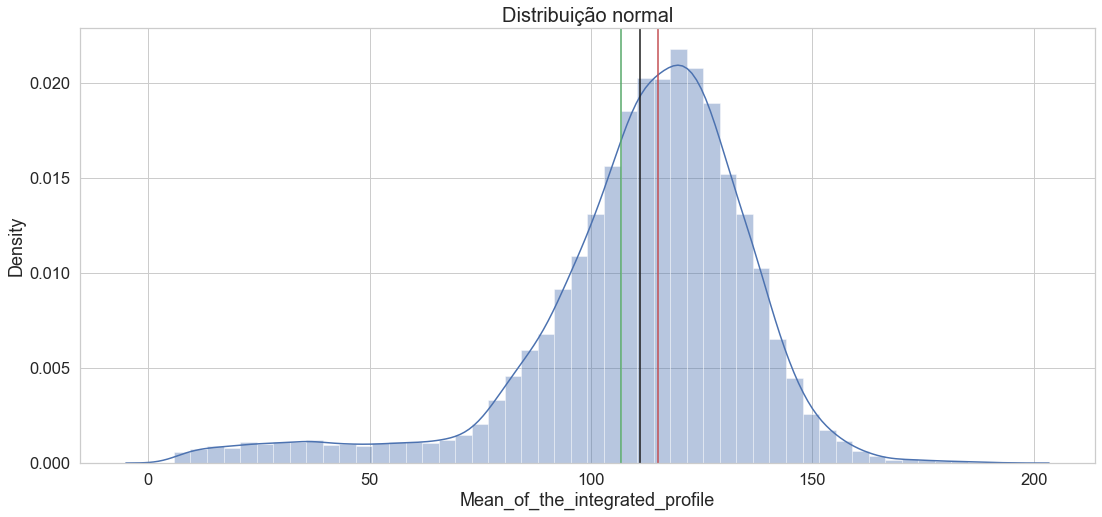

In [18]:
# Gráfico da Distribuição normal - Mean_of_the_integrated_profile
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df['Mean_of_the_integrated_profile']);
plt.title("Distribuição normal", fontsize=20)
plt.axvline(df['Mean_of_the_integrated_profile'].mean(), color='k')
plt.axvline(df['Mean_of_the_integrated_profile'].median(), color='r')
plt.axvline(df['Mean_of_the_integrated_profile'].mode()[0], color='g');

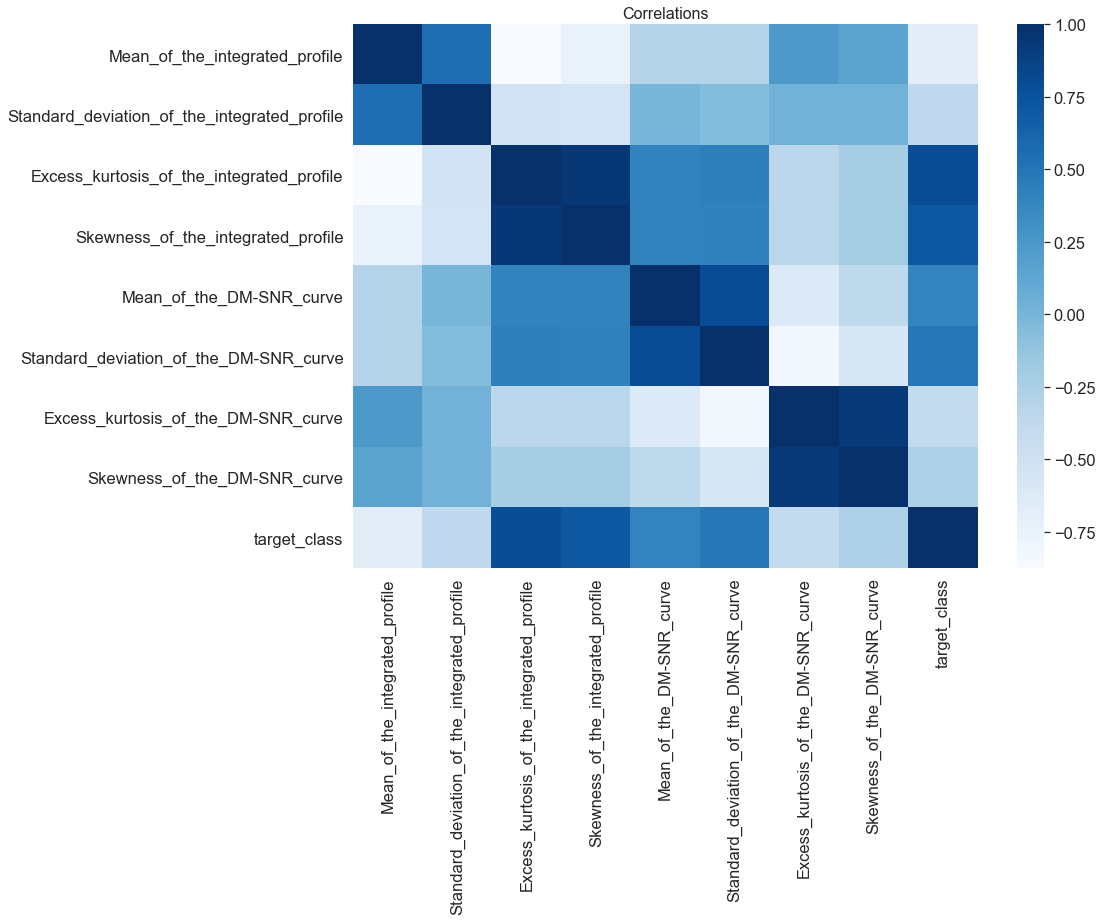

In [19]:
# Gráfico da matrz de correlação 

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations", size=16)
plt.show()

Text(0.5, 1.0, 'Matriz de correlação')

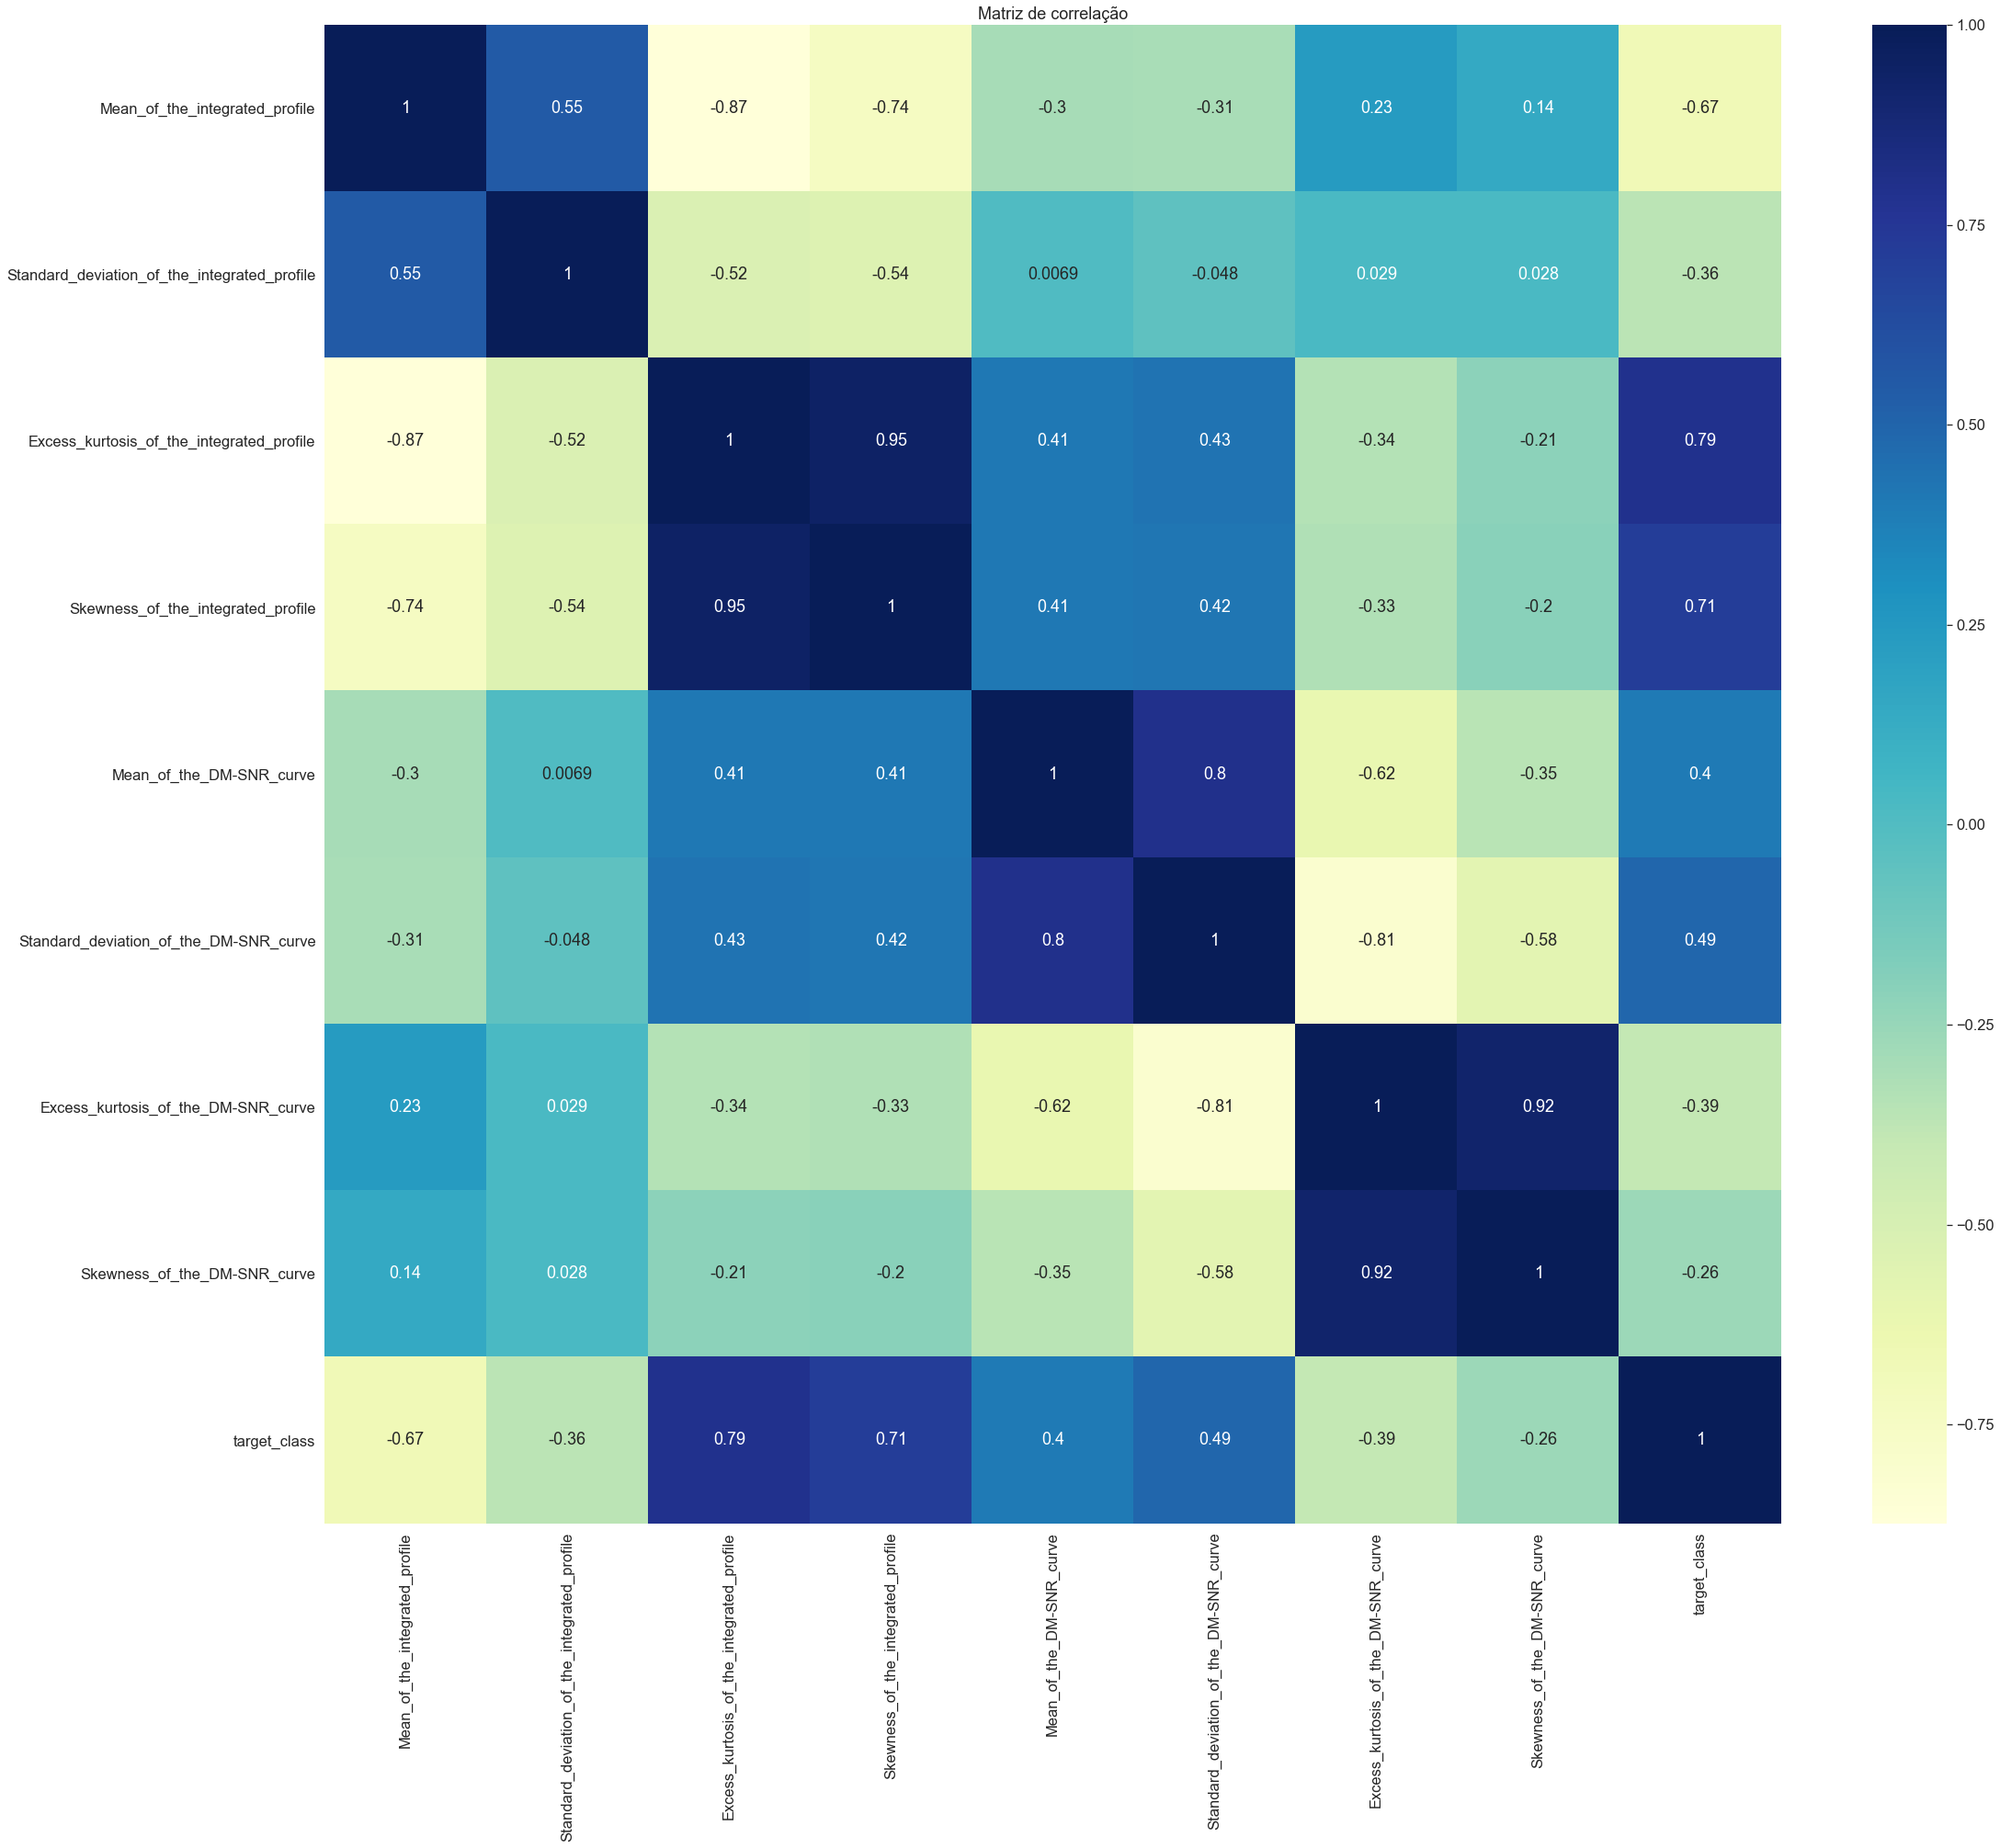

In [20]:
# Gráfico da matriz de correlação

plt.figure(figsize=(35.5,30))
ax = sns.heatmap(corr, annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

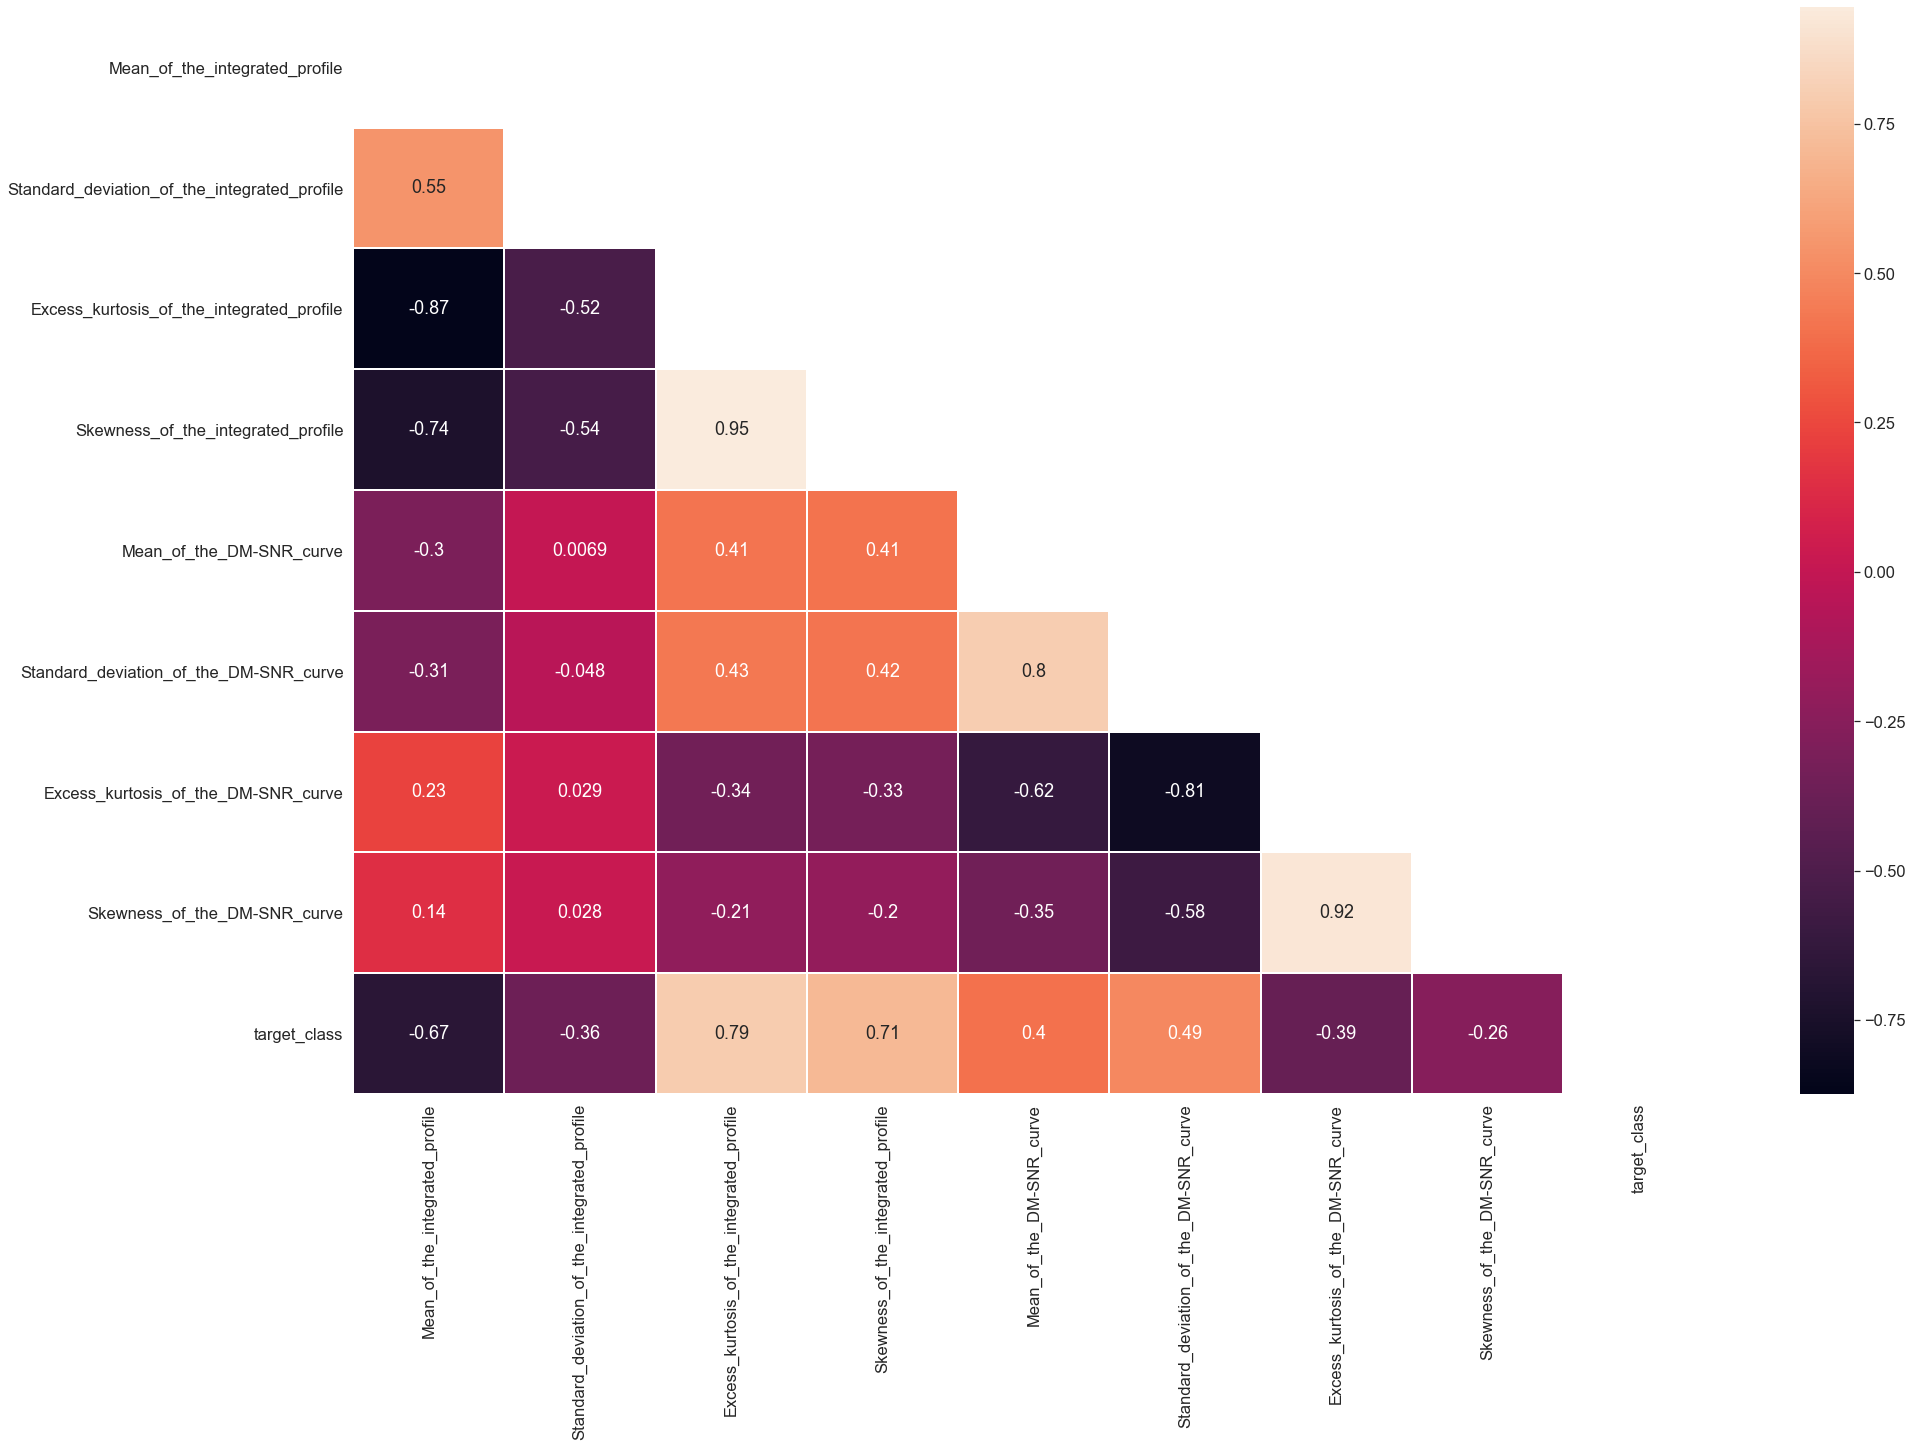

In [21]:
plt.figure(figsize=(30.5,20))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

# Análise dados

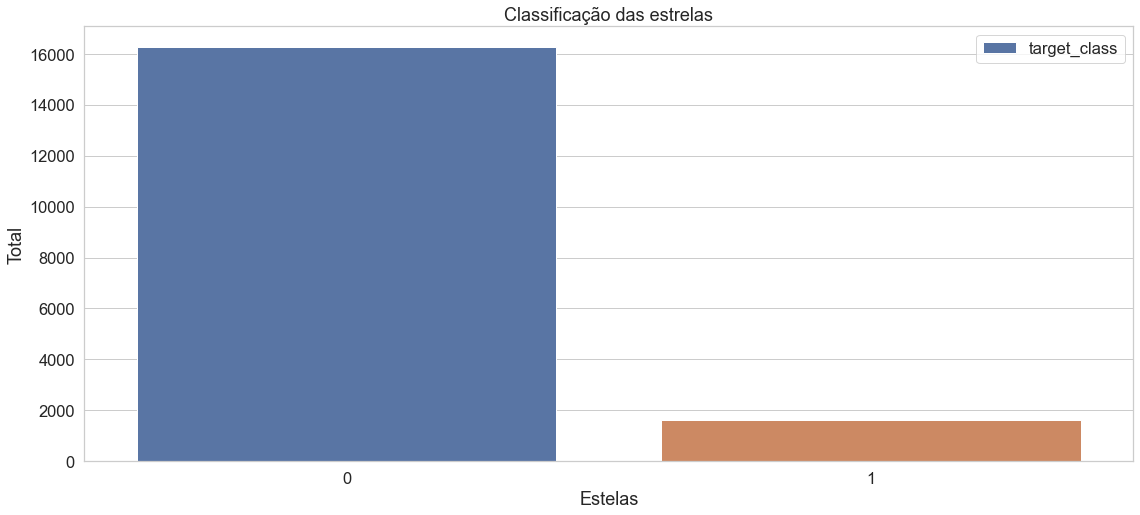

In [22]:
plt.figure(figsize=(18.8, 8))

sns.countplot(df["target_class"])
plt.title("Classificação das estrelas")
plt.xlabel("Estelas")
plt.ylabel("Total")
plt.legend(["target_class"])


Text(0.5, 0, 'Total')

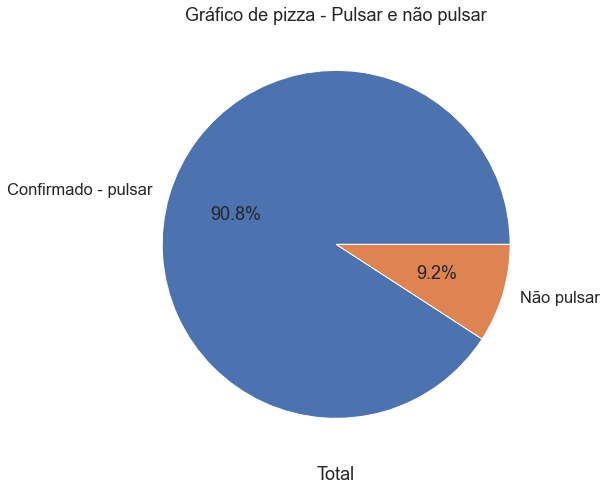

In [23]:
plt.figure(figsize=(15, 8))

plt.pie(df.groupby('target_class')['target_class'].count(), labels=['Confirmado - pulsar','Não pulsar'], autopct='%1.1f%%');
plt.title("Gráfico de pizza - Pulsar e não pulsar")
plt.xlabel("Total")

Text(0, 0.5, 'Total')

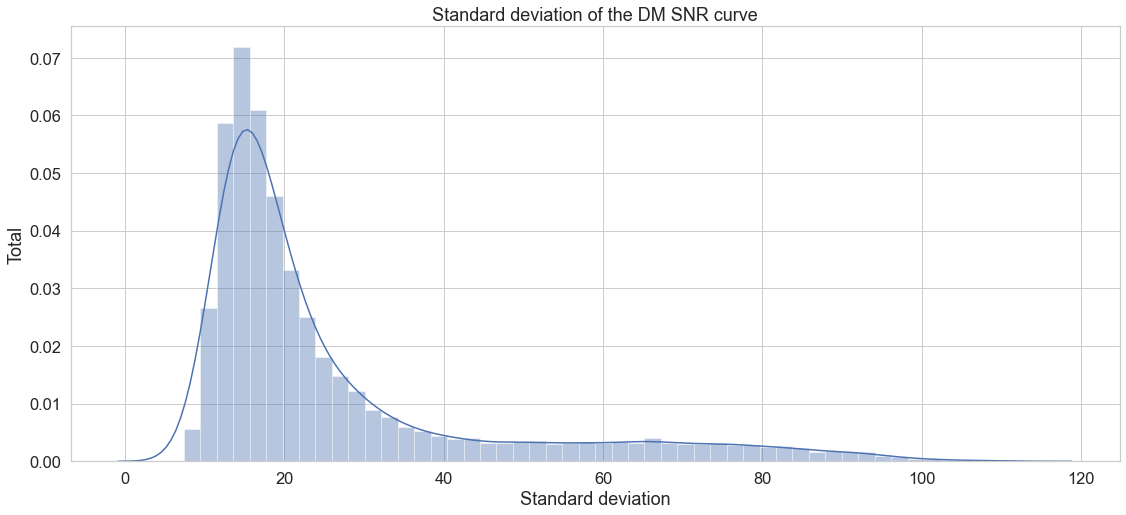

In [24]:
plt.figure(figsize=(18.8, 8))

ax = sns.distplot(df["Standard_deviation_of_the_DM-SNR_curve"])
plt.title("Standard deviation of the DM SNR curve")
plt.xlabel("Standard deviation")
plt.ylabel("Total")

Text(0.5, 0, 'DM SNR Curve')

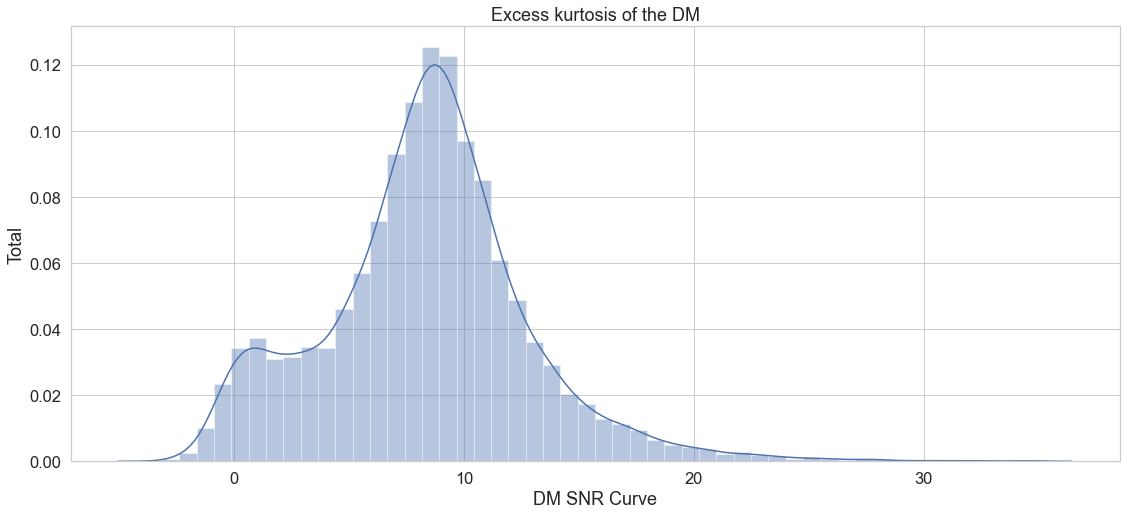

In [25]:
plt.figure(figsize=(18.8, 8))

sns.distplot(df["Excess_kurtosis_of_the_DM-SNR_curve"])
plt.title("Excess kurtosis of the DM")
plt.ylabel("Total")
plt.xlabel("DM SNR Curve")


Text(0, 0.5, 'Total')

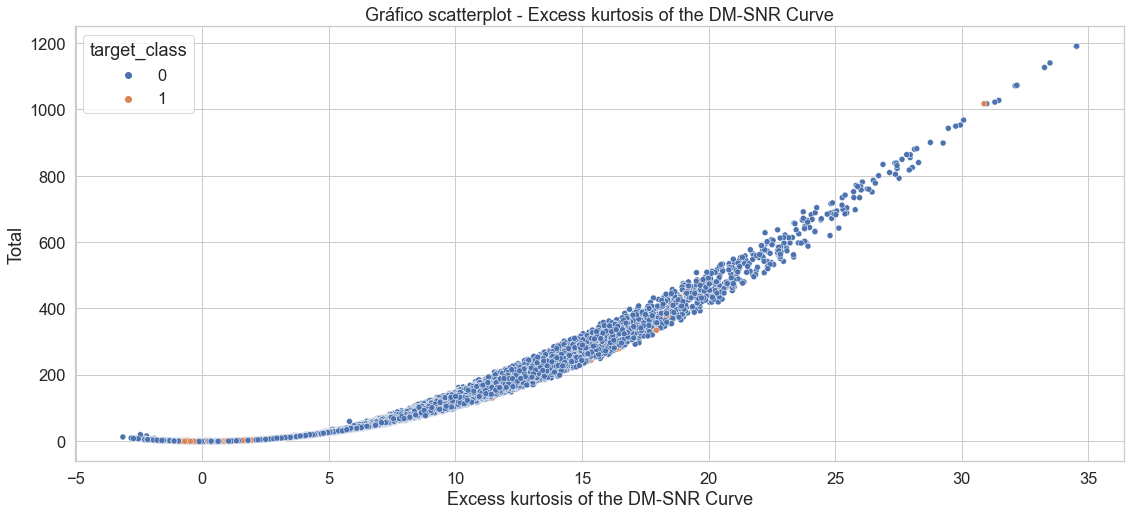

In [26]:
plt.figure(figsize=(18.8, 8))

ax = sns.scatterplot(x="Excess_kurtosis_of_the_DM-SNR_curve", y="Skewness_of_the_DM-SNR_curve", data = df, hue = "target_class")
plt.title("Gráfico scatterplot - Excess kurtosis of the DM-SNR Curve")
plt.xlabel("Excess kurtosis of the DM-SNR Curve")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

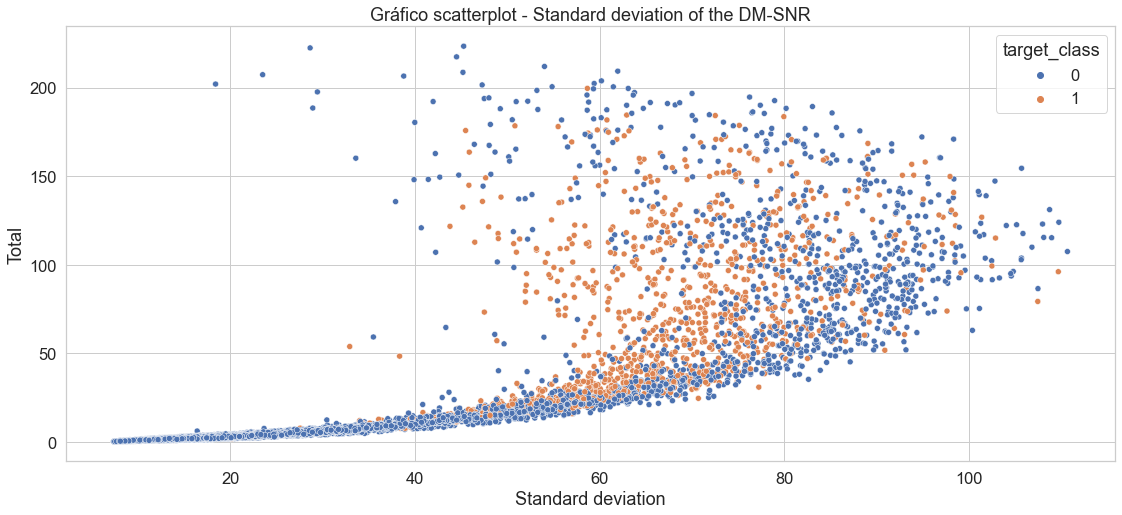

In [27]:
plt.figure(figsize=(18.8, 8))

ax = sns.scatterplot(x="Standard_deviation_of_the_DM-SNR_curve", y="Mean_of_the_DM-SNR_curve", data = df, hue = "target_class")
plt.title("Gráfico scatterplot - Standard deviation of the DM-SNR")
plt.xlabel("Standard deviation")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

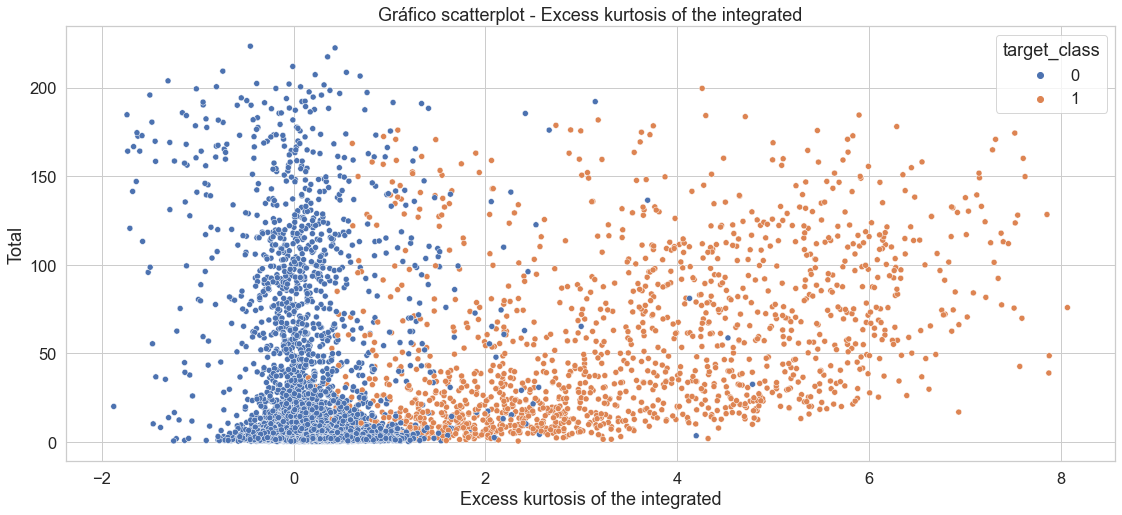

In [28]:
plt.figure(figsize=(18.8, 8))

ax = sns.scatterplot(x="Excess_kurtosis_of_the_integrated_profile", y="Mean_of_the_DM-SNR_curve", data = df, hue = "target_class")
plt.title("Gráfico scatterplot - Excess kurtosis of the integrated")
plt.xlabel("Excess kurtosis of the integrated")
plt.ylabel("Total")

# Análise de dados = Univariada

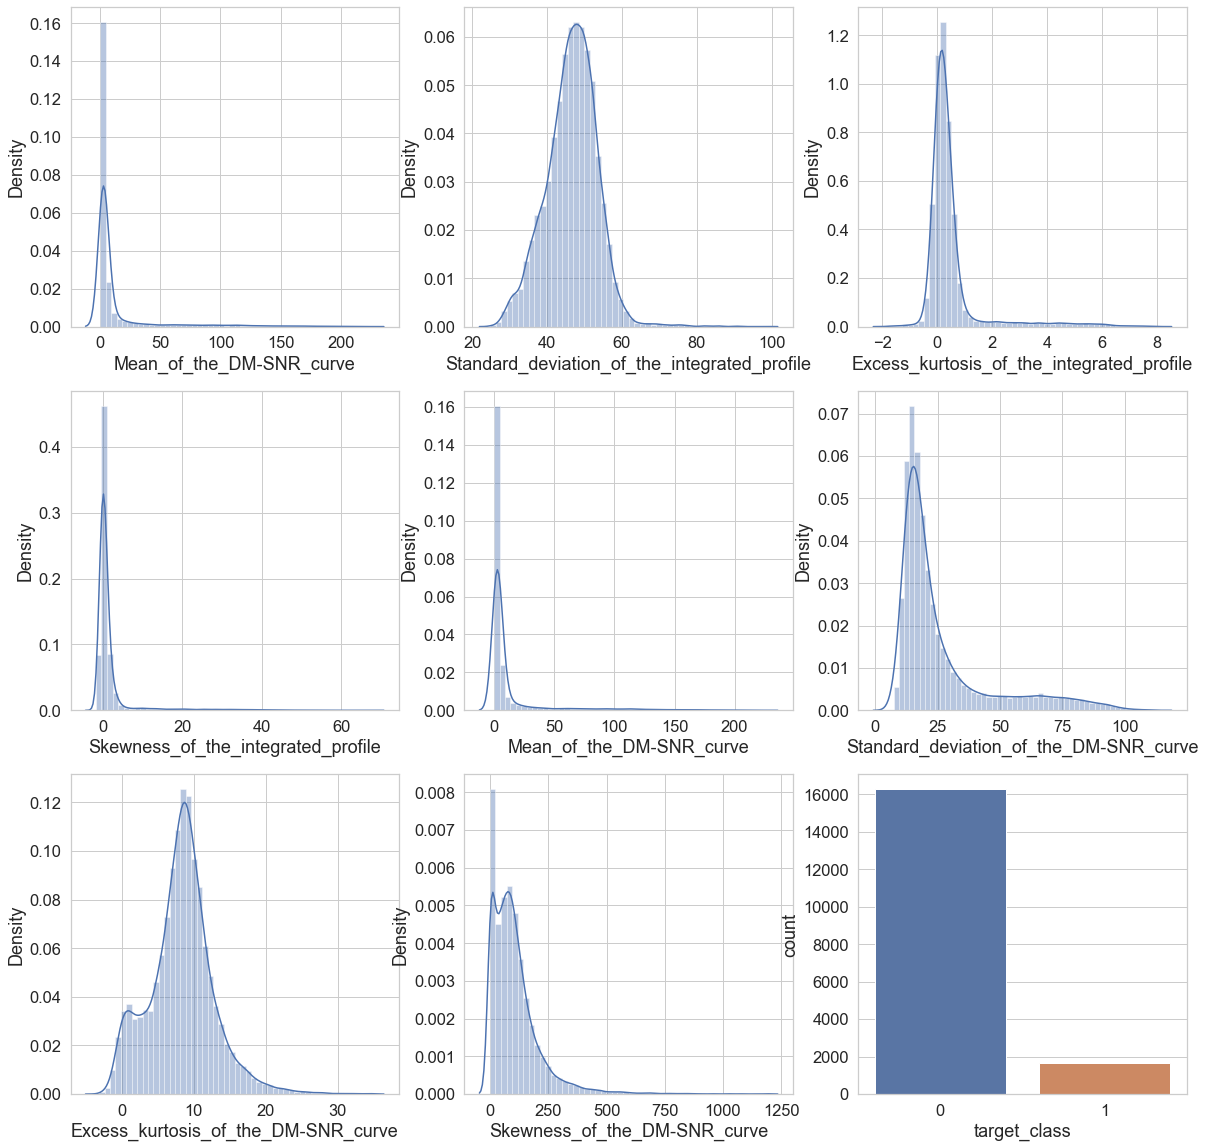

In [29]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.distplot(df["Mean_of_the_DM-SNR_curve"] , ax=axes[0, 0])
sns.distplot(df["Standard_deviation_of_the_integrated_profile"] ,  ax=axes[0, 1])
sns.distplot(df["Excess_kurtosis_of_the_integrated_profile"] , ax=axes[0, 2])
sns.distplot(df["Skewness_of_the_integrated_profile"], ax=axes[1, 0] )
sns.distplot(df["Mean_of_the_DM-SNR_curve"] , ax=axes[1, 1] )
sns.distplot(df["Standard_deviation_of_the_DM-SNR_curve"] , ax=axes[1, 2] )
sns.distplot(df["Excess_kurtosis_of_the_DM-SNR_curve"] , ax=axes[2, 0])
sns.distplot(df["Skewness_of_the_DM-SNR_curve"], ax=axes[2, 1])
sns.countplot(df["target_class"], ax=axes[2, 2])

plt.show()

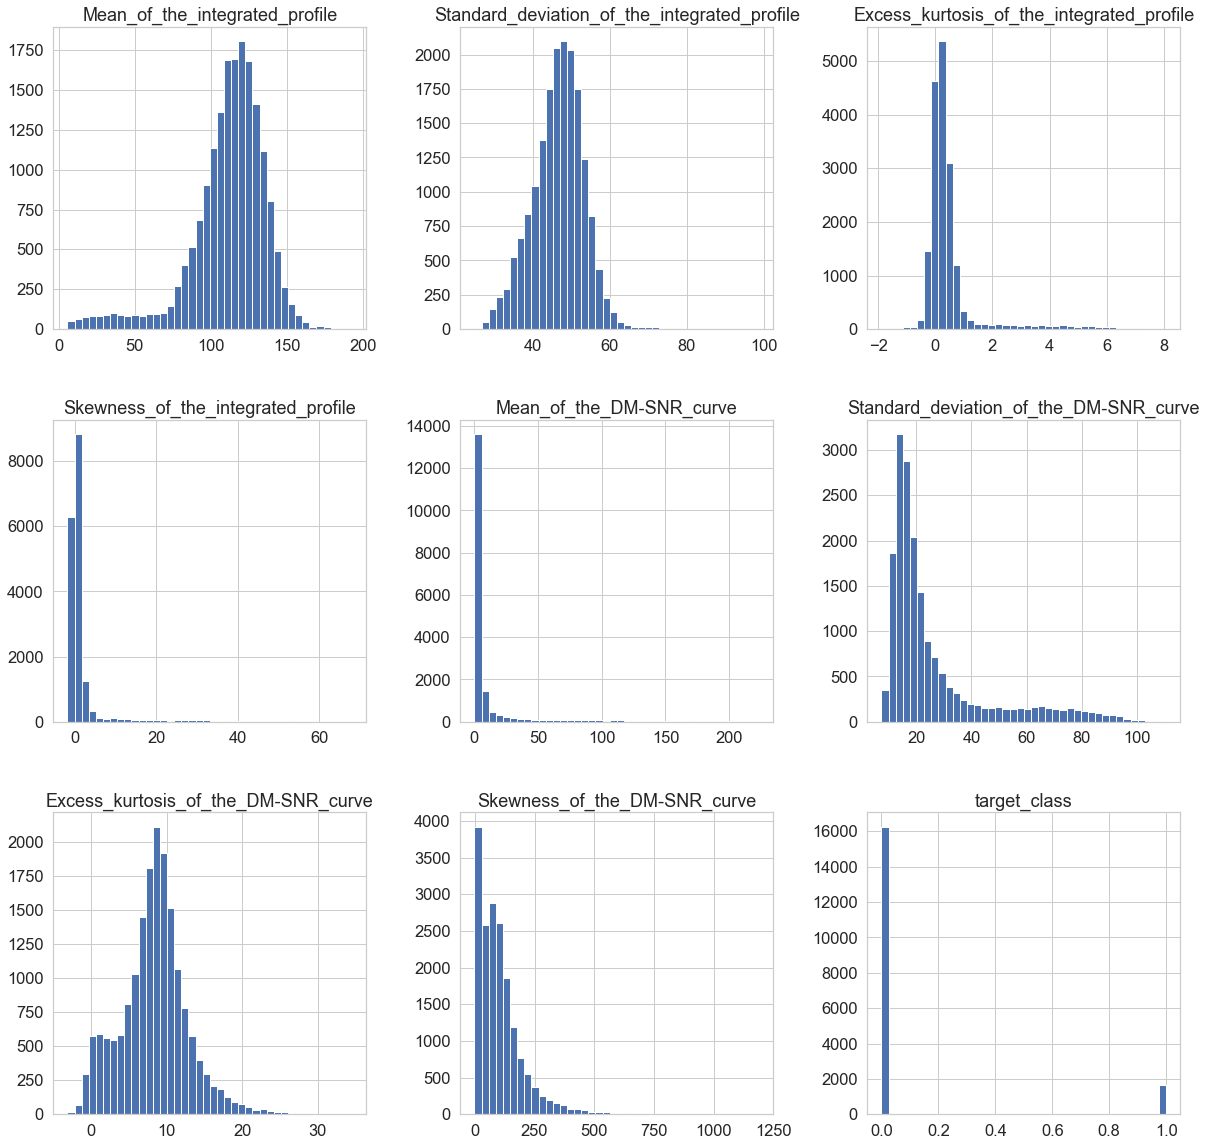

In [30]:
df.hist(bins = 40, figsize=(20.2, 20))
plt.show()

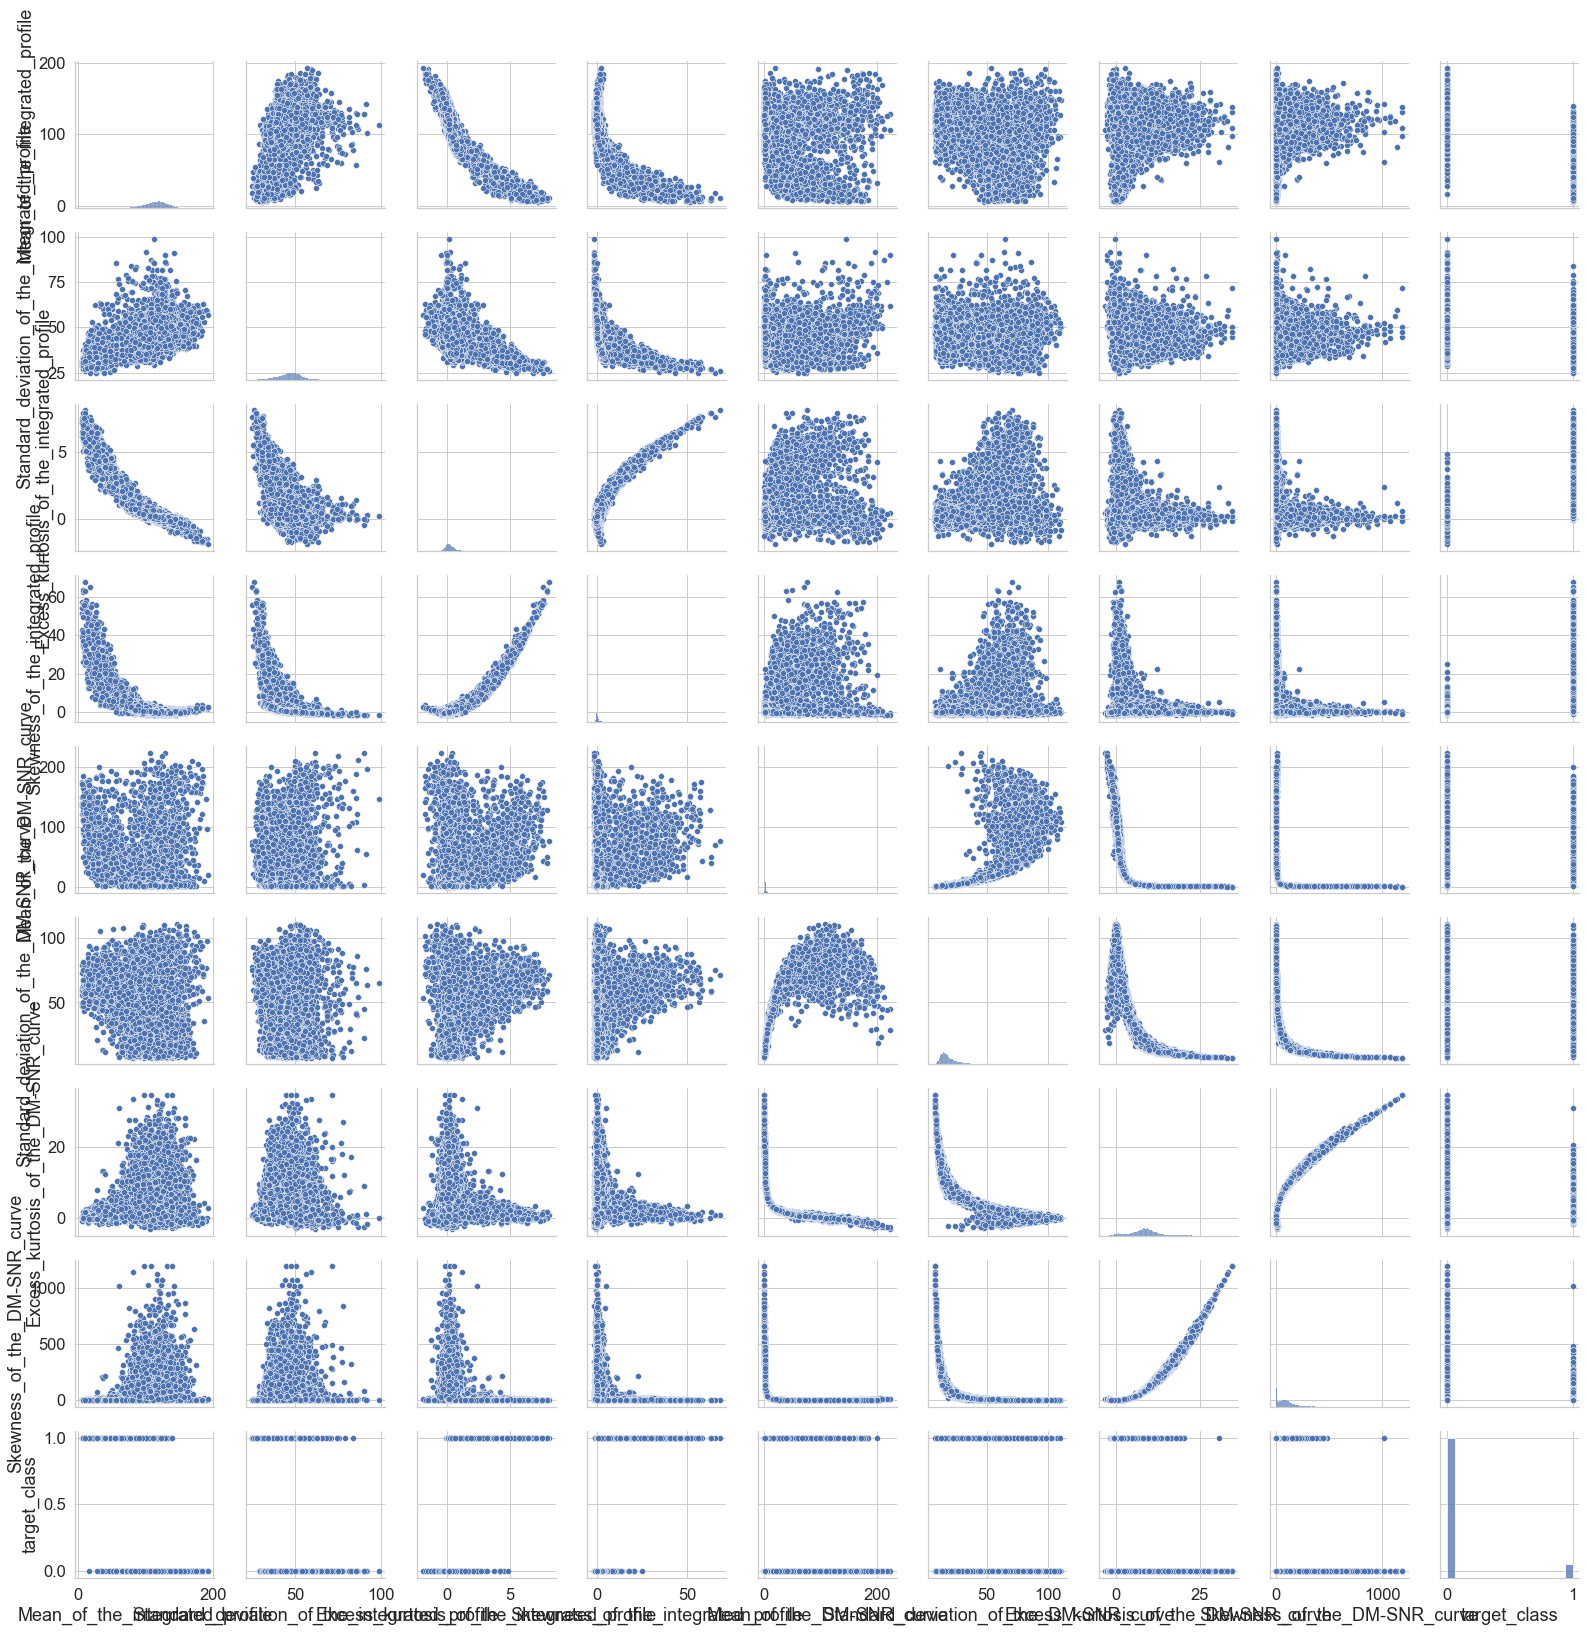

In [31]:
sns.pairplot(df)

# Pré - processamento de dados

O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.

**Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações.**

In [32]:
# Defenindo base de treino e teste train e test

x = df.drop(['target_class'],axis=1)
y = df["target_class"]

In [33]:
# Visualizando linha e coluna da váriavel x
x.shape

(17898, 8)

In [34]:
# Visualizando linha e coluna da váriavel y
y.shape

(17898,)

# Escalonamento dados

- Standard Scaler: padroniza um recurso subtraindo a média e escalando para a variância da unidade. 
A variância da unidade significa dividir todos os valores pelo desvio padrão. StandardScaler resulta em uma distribuição com um desvio padrão igual a 1. 

A variância é igual a 1.

Variância = desvio padrão ao quadrado. 

E 1 ao quadrado = 1. 

StandardScaler torna a média da distribuição aproximadamente 0.

In [35]:
from sklearn.preprocessing import StandardScaler

pre_scaler = StandardScaler()
x = pre_scaler.fit_transform(x)
x

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

In [36]:
# Visualizando linhas e colunas do escalonamento
x.shape

(17898, 8)

In [37]:
# Visualizando os dados
x[1:2,:]

array([[-0.3341682 ,  1.80226533, -0.01178476, -0.37053549, -0.37110188,
        -0.5889241 ,  0.50442694,  0.21158145]])

## Treino e teste

- Treino e teste do modelo machine learning
80 para dados de treino
20 para dados de teste


train_test_split: O train test split ele define o conjunto de dados de treinamento os dados em float deve estar entre 0.0 e 1 vai ser definirá o conjunto de dados teste.

- test_size: E o tamanho do conjunto de teste para ser usando dados de teste 0.25 ou 25 por cento.
- random_state: Devisão dos dados ele um objeto para controla a randomização durante a devisão dos dados 

In [38]:
# Treinando modelo machine learning e treino do modelo
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 123)

In [39]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train.shape

(14318, 8)

In [40]:
# Total de linhas dos dados de treino y

x_train.shape

(14318, 8)

In [41]:
# Total de linhas e colunas dos dados de treino x teste 

x_test.shape

(3580, 8)

In [42]:
# Total de linhas e colunas dos dados de treino y teste 

y_test.shape

(3580,)

# Pipeline machine learning

# Pipeline 1: K-NN

In [43]:
# Modelo pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

data_pipeline = Pipeline([
    ("scaler", StandardScaler()), # Scaler : Para pré-processamento de dados, ou seja, transforme os dados em média zero e variância de unidade usando o StandardScaler ().
    ("selector", VarianceThreshold()), # Seletor de recurso : Use VarianceThreshold () para descartar recursos cuja variação seja menor que um determinado limite definido.
    ("classifier", KNeighborsClassifier()) # Classificador : KNeighborsClassifier (), que implementa o classificador de k-vizinho mais próximo e seleciona a classe dos k pontos principais, que estão mais próximos do exemplo de teste.
])

data_pipeline_fit = data_pipeline.fit(x_train, y_train)
data_pipeline_score = data_pipeline.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.9828886716021791
Treinamento base teste - Pipeline: 0.9737430167597766


In [44]:
# Previsão do pipeline do modelo
data_pipeline_pred_1 = data_pipeline.predict(x_test)
data_pipeline_pred_1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
# Accuracy do pipeline

from sklearn.metrics import accuracy_score

accuracy_pipeline_1 = accuracy_score(y_test, data_pipeline_pred_1)
print("Accuracy - pipeline: %.2f" % (accuracy_pipeline_1 * 100))

Accuracy - pipeline: 97.37


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

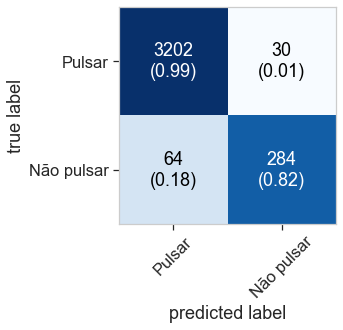

In [46]:
# A confusion matrix do modelo
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matrix_1 = confusion_matrix(y_test, data_pipeline_pred_1)
plot_confusion_matrix(matrix_1, show_normed=True, colorbar=False, class_names=['Pulsar', 'Não pulsar'])

roc_auc 0.9376831540912712


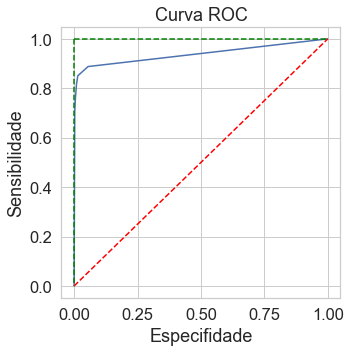

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

roc = data_pipeline.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [48]:
# Classification report do modelo
from sklearn.metrics import classification_report

classification = classification_report(y_test, data_pipeline_pred_1)
print("Modelo - Pipeline 1")
print()
print(classification)

Modelo - Pipeline 1

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3232
           1       0.90      0.82      0.86       348

    accuracy                           0.97      3580
   macro avg       0.94      0.90      0.92      3580
weighted avg       0.97      0.97      0.97      3580



In [49]:
# Métricas do modelo 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, data_pipeline_pred_1)
Recall = recall_score(y_test, data_pipeline_pred_1)
Accuracy = accuracy_score(y_test, data_pipeline_pred_1)
F1_Score = f1_score(y_test, data_pipeline_pred_1)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.973743
0,precision,0.904459
3,F1_Score,0.858006
1,Recall,0.816092


# Pipeline 2: Decision tree

In [50]:
# Pipeline decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

data_pipeline_2 = Pipeline([
    ("scaler", StandardScaler()), # Scaler : Para pré-processamento de dados, ou seja, transforme os dados em média zero e variância de unidade usando o StandardScaler ().
    ("selector", VarianceThreshold()), # Seletor de recurso : Use VarianceThreshold () para descartar recursos cuja variação seja menor que um determinado limite definido.
    ("classifier", DecisionTreeClassifier(max_depth=4, random_state=0)) # Classificador : DecisionTreeClassifier (), que implementa o classificador de árvore decisão Árvores de decisão são métodos de classificação que podem extrair regras simples sobre os recursos de dados que são inferidos do conjunto de dados de entrada
])

data_pipeline2_fit = data_pipeline_2.fit(x_train, y_train)
data_pipeline2_score = data_pipeline_2.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline_2.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline_2.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.9830283559156306
Treinamento base teste - Pipeline: 0.9737430167597766


In [51]:
# Previsão do pipeline 
data_pipeline_pred_2 = data_pipeline_2.predict(x_test)
data_pipeline_pred_2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
# Accuracy do pipeline
accuracy_pipeline_2 = accuracy_score(y_test, data_pipeline_pred_2)
print("Accuracy Pipeline 2: %.2f" % (accuracy_pipeline_2 * 100))

Accuracy Pipeline 2: 97.37


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

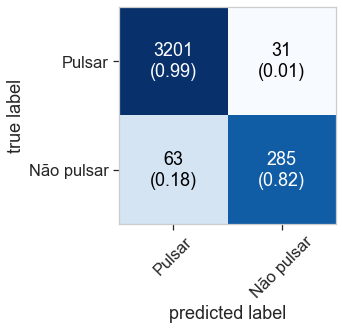

In [53]:
# A matrix confusion do modelo
matrix_confusion_1 = confusion_matrix(y_test, data_pipeline_pred_2)

plot_confusion_matrix(matrix_confusion_1, show_normed=True, colorbar=False, class_names=['Pulsar', 'Não pulsar'])

roc_auc 0.9622858164049164


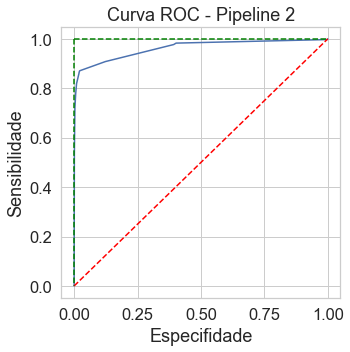

In [54]:
# Curva ROC do modelo
roc = data_pipeline_2.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Pipeline 2')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [55]:
# Classification_report
classification = classification_report(y_test, data_pipeline_pred_2)

print("Modelo Pipeline 2")
print()
print(classification)

Modelo Pipeline 2

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3232
           1       0.90      0.82      0.86       348

    accuracy                           0.97      3580
   macro avg       0.94      0.90      0.92      3580
weighted avg       0.97      0.97      0.97      3580



In [56]:
# Méricas do modelo
precision = precision_score(y_test, data_pipeline_pred_2)
Recall = recall_score(y_test, data_pipeline_pred_2)
Accuracy = accuracy_score(y_test, data_pipeline_pred_2)
F1_Score = f1_score(y_test, data_pipeline_pred_2)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.973743
0,precision,0.901899
3,F1_Score,0.858434
1,Recall,0.818966


# Pipeline 03 - Naive bayes

In [57]:
%%time
from sklearn.naive_bayes import GaussianNB

# Pipeline Naive bayes
data_pipeline_3 = Pipeline([
    ("scaler", StandardScaler()), 
    ("selector", VarianceThreshold()), 
    ("classifier", GaussianNB())])

data_pipeline3_fit = data_pipeline_3.fit(x_train, y_train)
data_pipeline3_score = data_pipeline_3.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(data_pipeline_3.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(data_pipeline_3.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.9473390138287471
Treinamento base teste - Pipeline: 0.9346368715083799
Wall time: 24.9 ms


In [58]:
# Previsão do pipeline
data_pipeline_pred_3 = data_pipeline_3.predict(x_test)
data_pipeline_pred_3

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
# Accuracy do pipeline
accuracy_pipeline_3 = accuracy_score(y_test, data_pipeline_pred_3)
print("Accuracy pipeline 3: %.2f" % (accuracy_pipeline_3 * 100))

Accuracy pipeline 3: 93.46


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

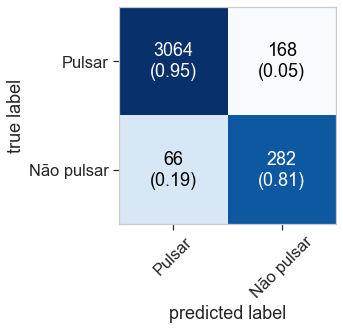

In [60]:
# A matrix confusion pipeline
matrix_confusion_4 = confusion_matrix(y_test, data_pipeline_pred_3)

plot_confusion_matrix(matrix_confusion_4, show_normed=True, colorbar=False, class_names=['Pulsar', 'Não pulsar'])

roc_auc 0.9432097843405031


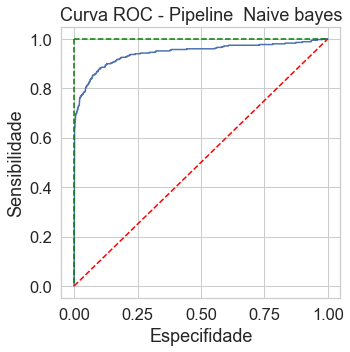

In [61]:
# Curva ROC do pipeline
roc = data_pipeline_3.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Pipeline  Naive bayes')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [62]:
# Classification report do modelo
class_report = classification_report(y_test, data_pipeline_pred_3)

print("Modelo 03 - Pipeline")
print()
print(class_report)

Modelo 03 - Pipeline

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3232
           1       0.63      0.81      0.71       348

    accuracy                           0.93      3580
   macro avg       0.80      0.88      0.83      3580
weighted avg       0.94      0.93      0.94      3580



In [63]:
# Metricas do pipeline
precision = precision_score(y_test, data_pipeline_pred_3)
Recall = recall_score(y_test, data_pipeline_pred_3)
Accuracy = accuracy_score(y_test, data_pipeline_pred_3)
F1_Score = f1_score(y_test, data_pipeline_pred_3)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.934637
1,Recall,0.810345
3,F1_Score,0.706767
0,precision,0.626667


# Pipeline 04 - Regressão logistica

In [64]:
%%time

# Importação da biblioteca
from sklearn.linear_model import LogisticRegression

# Nome pipeline LR
pipeline_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", VarianceThreshold()),
    ("classifier", LogisticRegression())])

# Treinamento pipeline
pipeline_3_fit = pipeline_3.fit(x_train, y_train)

# Score do pipeline
pipeline_3_score = pipeline_3.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(pipeline_3.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(pipeline_3.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.9803045118033245
Treinamento base teste - Pipeline: 0.9726256983240223
Wall time: 52.9 ms


In [65]:
# Previsão do pipeline
data_pipeline_pred_4 = pipeline_3.predict(x_test)
data_pipeline_pred_4

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [66]:
# Accuracy do pipeline

accuracy_pipeline_4 = accuracy_score(y_test, data_pipeline_pred_3)
print("Accuracy pipeline 3: %.2f" % (accuracy_pipeline_4 * 100))

Accuracy pipeline 3: 93.46


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

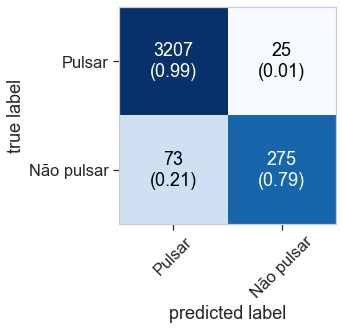

In [67]:
# A matrix confusion pipeline
matrix_confusion_4 = confusion_matrix(y_test, data_pipeline_pred_4)
plot_confusion_matrix(matrix_confusion_4, show_normed=True, colorbar=False, class_names=['Pulsar', 'Não pulsar'])

roc_auc 0.9744624516330943


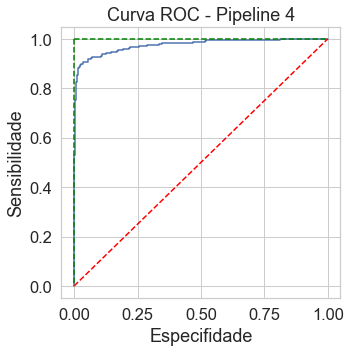

In [68]:
# Curva ROC do pipeline
roc = pipeline_3.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Pipeline 4')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [69]:
# Classification report do modelo

class_report = classification_report(y_test, data_pipeline_pred_4)

print("Modelo 04 - Pipeline")
print("\n")
print(class_report)

Modelo 04 - Pipeline


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3232
           1       0.92      0.79      0.85       348

    accuracy                           0.97      3580
   macro avg       0.95      0.89      0.92      3580
weighted avg       0.97      0.97      0.97      3580



In [70]:
# Metricas do pipeline
precision = precision_score(y_test, data_pipeline_pred_4)
Recall = recall_score(y_test, data_pipeline_pred_4)
Accuracy = accuracy_score(y_test, data_pipeline_pred_4)
F1_Score = f1_score(y_test, data_pipeline_pred_4)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.972626
0,precision,0.916667
3,F1_Score,0.848765
1,Recall,0.790230


# Pipeline 05 - Gradient boosting

In [71]:
%%time

# Importação da biblioteca 
from sklearn.ensemble import GradientBoostingClassifier

# Nome pipeline modelo
pipeline_5 = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", VarianceThreshold()),
    ("classifier", GradientBoostingClassifier())])

# Treinamento do pipeline
pipeline_5_fit = pipeline_5.fit(x_train, y_train)

# Score pipeline
pipeline_5_score = pipeline_5.score(x_train, y_train)

print('Treinamento base treino - Pipeline: ' + str(pipeline_5.score(x_train,y_train)))
print('Treinamento base teste - Pipeline: ' + str(pipeline_5.score(x_test,y_test)))

Treinamento base treino - Pipeline: 0.9872887274759045
Treinamento base teste - Pipeline: 0.9729050279329609
Wall time: 4.93 s


In [72]:
# Previsão do pipeline
data_pipeline_pred_5 = pipeline_5.predict(x_test)
data_pipeline_pred_5

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [73]:
# Accuracy do pipeline
accuracy_pipeline_5 = accuracy_score(y_test, data_pipeline_pred_3)

print("Accuracy pipeline 3: %.2f" % (accuracy_pipeline_5 * 100))

Accuracy pipeline 3: 93.46


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

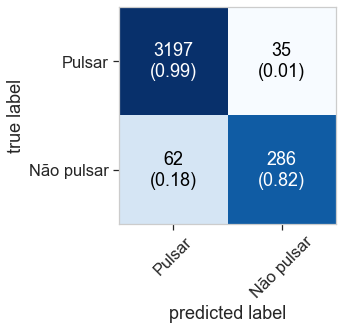

In [74]:
# A matrix confusion pipeline
matrix_confusion_5 = confusion_matrix(y_test, data_pipeline_pred_5)

plot_confusion_matrix(matrix_confusion_5, show_normed=True, colorbar=False, class_names=['Pulsar', 'Não pulsar'])

roc_auc 0.9775814057698873


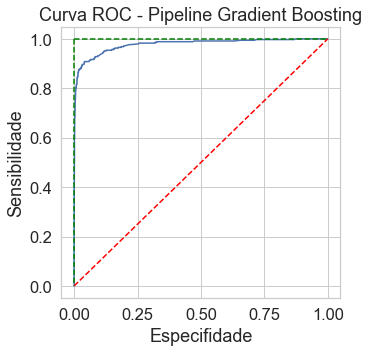

In [75]:
# Curva ROC do pipeline
roc = pipeline_5.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Pipeline Gradient Boosting')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [76]:
# Classification report do modelo
class_report = classification_report(y_test, data_pipeline_pred_5)
print("Modelo 03 - Pipeline")
print("\n")
print(class_report)

Modelo 03 - Pipeline


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3232
           1       0.89      0.82      0.86       348

    accuracy                           0.97      3580
   macro avg       0.94      0.91      0.92      3580
weighted avg       0.97      0.97      0.97      3580



In [77]:
# Metricas do pipeline
precision = precision_score(y_test, data_pipeline_pred_5)
Recall = recall_score(y_test, data_pipeline_pred_5)
Accuracy = accuracy_score(y_test, data_pipeline_pred_5)
F1_Score = f1_score(y_test, data_pipeline_pred_5)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.972905
0,precision,0.890966
3,F1_Score,0.855007
1,Recall,0.821839


# Resultados

In [83]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Modelos" :["Pipeline 1: K-NN",
                "Pipeline 2: Decision tree",
                "Pipeline 3: Naive bayes",
                "Pipeline 4: Regressão logistica",
                "Pipeline 5: Gradient"],

    "Acurácia" :[accuracy_pipeline_1,
                 accuracy_pipeline_2,
                 accuracy_pipeline_3,
                 accuracy_pipeline_4,
                 accuracy_pipeline_5]})

modelos_2 = modelos.sort_values(by = "Acurácia", ascending = False)
modelos_2

,Modelos,Acurácia
0,Pipeline 1: K-NN,0.973743
1,Pipeline 2: Decision tree,0.973743
2,Pipeline 3: Naive bayes,0.934637
3,Pipeline 4: Regressão logistica,0.934637
4,Pipeline 5: Gradient,0.934637


# Salvando modelo 

In [81]:
# Salvando pipeline Machine learning

import pickle    
    
with open('data_pipeline_pred_1.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_1, file)
    
with open('data_pipeline_pred_2.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_2, file)
    
with open('data_pipeline_pred_3.pkl', 'wb') as file:
    pickle.dump(data_pipeline_pred_3, file)